<a href="https://colab.research.google.com/github/ameneh1376/winter_AI_school/blob/master/new_GAOGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **load data**

In [ ]:
import numpy as np
from sklearn import datasets

def load_data(dataset,subject_number):

    if dataset =="eeg":
        subject_train=np.load("/content/drive/My Drive/data/train_subject.npy")
        subject_test=np.load("/content/drive/My Drive/data/test_subject.npy")
        X_tr=np.load("/content/drive/My Drive/data/train_latent.npy")
        X_te=np.load("/content/drive/My Drive/data/test_latent.npy")
        y_tr=np.load("/content/drive/My Drive/data/train_label.npy")
        y_te=np.load("/content/drive/My Drive/data/test_label.npy")
        X=np.array((8357,64))
        y=np.array((8357,1))
        

        X=np.vstack((X_te,X_tr))
        y=np.vstack((y_te,y_tr))
        # for i in range(y.shape[0]):
        #   if y[i][0]==0:
        #     y[i][0]=-1.0


        subject=np.vstack((subject_test,subject_train))
        # kf = KFold(n_splits=3) # Define the split - into 2 folds 
        # kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
        # # print(kf) 
        
        # for train_index, test_index in kf.split(X):
        #   # print "TRAIN:", train_index, "TEST:", test_index
        #   X_train, X_test = X[train_index], X[test_index]
        #   y_train, y_test = y[train_index], y[test_index]

        X_test= np.zeros((1,64))
        X_train=np.zeros((1,64))
        y_test=np.zeros((1,1))
        y_train=np.zeros((1,1))
        
        for i in range(X.shape[0]):
          if subject[i]==subject_number:
            if i==0:
              X_test=X[i]
              y_test=y[i]
            else:  
              X_test=np.vstack((X_test,X[i]))
              y_test=np.vstack((y_test,y[i]))
              
          else:
            if i==0:
              X_train=X[i]
              y_train=y[i]
            else:  
              X_train=np.vstack((X_train,X[i]))
              y_train=np.vstack((y_train,y[i]))
        sd=np.max(X_train)-np.min(X_train)
        minn=np.min(X_train)
        X_train=(X_train-minn)/(sd)
        X_test=(X_test-minn)/(sd)
        # X_new, X_train_genetic, y_new, y_train_genetic = train_test_split(X,y,test_size = 0.08, random_state = 1)
        # X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size = 0.20, random_state = 1)
    elif dataset =="p300":  

        subject_train=np.load("/content/drive/My Drive/train_subject.npy")
        subject_test=np.load("/content/drive/My Drive/test_subject.npy")
        # X=np.load("/content/drive/My Drive/data/p300.npy")
        y_tr=np.load("/content/drive/My Drive/data/train_label.npy")
        y_te=np.load("/content/drive/My Drive/data/test_label.npy")
        # X=np.array((8357,64))
        y=np.array((8357,1))
        
        # X=np.vstack((X_te,X_tr))
        y=np.vstack((y_te,y_tr))
        subject=np.vstack((subject_test,subject_train))

    #     X_test= np.zeros((1,31))
    #     X_train=np.zeros((1,31))
    #     y_test=np.zeros((1,1))
    #     y_train=np.zeros((1,1))  
    #     for i in range(p300.shape[0]):
    #       if subject[i]==subject_number:
    #         if X_test.shape[0]==1:
    #           X_test=p300[i]
    #           y_test=y[i]
    #         else:  
    #           X_test=np.vstack((X_test,p300[i]))
    #           y_test=np.vstack((y_test,y[i]))
              
    #       else:
    #         if X_train.shape[0]==1:
    #           X_train=p300[i]
    #           y_train=y[i]
    #         else:  
    #           X_train=np.vstack((X_train,p300[i]))
    #           y_train=np.vstack((y_train,y[i]))

    # elif dataset =="cancer":
    #     data = datasets.load_breast_cancer()
    #     X = data.data
    #     y = data.target
    #     y_clean = []
    #     for item in y:
    #         if item==1:
    #             y_clean.append(item)
    #         elif item==0:
    #             y_clean.append(-1)
    #     y = np.array(y_clean)
    #     # X_new, X_adaptive, y_new, y_adaptive = train_test_split(X,y,test_size = 0.05, random_state = 1)
        
    #     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 1)

        
    return X_train,X_test, y_train,y_test,X,y

# **ensembles**

## osb **boost**

In [ ]:
from collections import defaultdict
import numpy as np

class OSBoost(object):

	def __init__(self, learners, classes, total_points = 10, gamma = 0.1):
		self.M = total_points
		self.learners = [learners(classes) for i in range(self.M)]
		self.alpha = np.ones(self.M)/self.M
		self.gamma = gamma
		self.theta = self.gamma/(2 + self.gamma)


	def update(self, X, y):
		z_t = 0.0
		w = 1.0
		for learner in self.learners:
			z_t += learner.predict(X)*y - self.theta
			learner.partial_fit(X, y, sample_weight = w)
			if z_t <=0:
				w = 1.0
			else:
				w = (1.0 - self.gamma)** (z_t/2.0)

	def raw_predict(self, X):
		return sum(learner.predict(X) for learner in self.learners)

	def classify(self, X):
		label_weights = {}
		for i in range(self.M):
			pred_y = self.learners[i].predict(X)
			if pred_y in label_weights.iterkeys():
				label_weights[pred_y] += self.alpha[i]
			else:
				label_weights[pred_y] = self.alpha[i]

		key = max(label_weights.iterkeys(), key=(lambda key: label_weights[key]))
		return key

## exp **boost**

In [ ]:
"""
    An online boosting algorithm which mixes SmoothBoost with
    "Learning from Expert Advice" from Chen '12.
"""

from random import random
from collections import defaultdict
# from osboost import OSBoost


def choose(p):
    r = random()
    n = len(p)
    p /= sum(p)
    cdf = 0.0
    for i in range(n):
        cdf += p[i]
        if r < cdf:
            return i + 1
    return n


class EXPBoost(OSBoost):

    def update(self, features, label):
        beta = 0.5
        exp_predict = 0.0

        for i, learner in enumerate(self.learners):
            exp_predict += learner.predict(features)
            if exp_predict * label <= 0:
                self.alpha[i] *= beta

        super(EXPBoost, self).update(features, label)

    def classify(self, features):
        k = choose(self.alpha)
        label_weights = defaultdict(int)
        for i in range(k):
            label = self.learners[i].predict(features)
            label_weights[label] += self.alpha[i]

        return max(label_weights.iterkeys(), key=(lambda key: label_weights[key]))

## oza **boost**

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
:mod:`Ozaboost`
==================
.. module:: Ozaboost
   :platform: Mac OS X
   :synopsis:
.. moduleauthor:: deshana.desai@nyu.edu
Created on 2017-11-19, 5:00
"""
from random import shuffle
from collections import defaultdict
from math import log
import math
import numpy as np
from numpy.random import poisson, seed

class OzaBoostClassifier():
	def __init__(self, learners, classes, total_points):
		self.total_points = total_points
		self.classes = classes
		self.learners = [learners(classes) for i in range(self.total_points)]
		#self.learners = [DecisionTree(classes) for i in range(self.total_points)]
		#self.learners = [perceptron.Perceptron(classes) for i in range(self.total_points)]
		#self.learners = [sgd_classifier(classes) for i in range(self.total_points)]
		self.correct = [0.0 for i in range(self.total_points)]
		self.incorrect = [0.0 for i in range(self.total_points)]
		self.error = [0.0 for i in range(self.total_points)]
		self.coeff = [0.0 for i in range(self.total_points)]

        def get_error_rate(self, predictions, Y):
			temp = zip(predictions, Y)
			correct = 0.0
			for (p,y) in temp:
				if p==y:
					correct+=1
			return float(correct)/float(len(Y))

	def pretrain(self, train_X, train_Y, X_val, y_val):
		errors = []
		import random
		data = zip(train_X, train_Y)
		for i, learner in enumerate(self.learners):
			datapoints_x = []
			datapoints_y = []
			while True:
				index_point = random.randint(0,train_X.shape[0]-1)
				datapoints_x.append(train_X[index_point])
				datapoints_y.append(train_Y[index_point])
				learner.fit(datapoints_x, datapoints_y, self.classes)
				test_error = self.get_error_rate(learner.model.predict(X_val), y_val)
				if test_error>0.5:
					break
				#train_X, train_Y, test_X, test_Y = train_test_split(data, test_size = 0.2)
			#learner.model.fit(datapoint_x, train_Y)
			#learner.model.fit(datapoints_x,datapoints_y)
			#test_error = learner.model.predict(X_val)
			training_error = learner.model.predict(train_X)
			errors.append((self.get_error_rate(training_error, train_Y),test_error))
		return errors

	def update(self, X, Y):
		weight = 1.0
		#shuffle(self.learners)
		for i, learner in enumerate(self.learners):
			#print "Round: ",i
			k = poisson(weight)
			#print "Poisson Dist: ",k
			if k<=0:
				continue

			for j in range(k):
				learner.partial_fit(X,Y)
			
			prediction = learner.predict(X)
			
			#tree.export_graphviz(learner.model, out_file = "learner_"+str(i)+".dot")
			#print "Initial Weight: ", weight

			if prediction == Y:
				self.correct[i] = self.correct[i]+weight
				N = float(self.correct[i]+self.incorrect[i])
				temp = (N/(2.0*float(self.correct[i])))
				
				weight *= temp
				#print "Weight of example has decreased to: ",weight
			else:
				self.incorrect[i] = self.incorrect[i]+weight
				N = float(self.correct[i]+self.incorrect[i])
				weight = weight*(N/(2*self.incorrect[i]))
				#print "Weight of example has increased to: ",weight

	def classify(self,X):	
		label_weights = {}
		
		for i, learner in enumerate(self.learners):
			N = self.correct[i]+self.incorrect[i]+ 1e-16
			self.error[i] = (self.incorrect[i]+ 1e-16)/N
			self.coeff[i] = (self.error[i]+ 1e-16)/(1.0-self.error[i]+ 1e-16)

		for i,learner in enumerate(self.learners):
			weight_learner = log(1/self.coeff[i])
			label = learner.predict(X)
			if label in label_weights.keys():
				label_weights[label] += weight_learner
			else:
				label_weights[label] = weight_learner
		#print("learner ",i,": ",format(weight_learner,"0.2f"))

		return max(label_weights.iterkeys(), key = (lambda key: label_weights[key]))
			

## **smooth boost**

In [ ]:
  
from math import e

class SmoothBoost(object):
	# Learner = weak_learner, classes = self.classes, M= m,trials=1,alpha=alpha,ta=ta,gama=gama
	def __init__(self, Learner, classes, M,trials,alpha,ta,gama):
		self.classes = classes
		self.M = M
		self.learners = [Learner(classes,alpha,ta) for i in range(self.M)]

	def update(self, X, y):
		f = 0
		w = 0.5

		for learner in self.learners:
			learner.partial_fit(X, y, sample_weight = w)
			f += learner.predict(X)
			w = 1.0 / (1.0 + e**(y*f))

	def predict(self, X):
		label_weights = {}
		for i, learner in enumerate(self.learners):
			pred_y = learner.predict(X)
			if pred_y in label_weights.keys():
				label_weights[pred_y] += 1
			else:
				label_weights[pred_y] = 1
	        return max(label_weights.iterkeys(), key=(lambda key: label_weights[key]))

## **GAGOB**

In [ ]:
"""
    An Online Gradient Boost implementaton from Leistner.
"""

from math import log, e ,exp
from sys import maxint
import numpy as np


class GAOGBooster(object):


    @staticmethod
    def loss(x):
        return log(1.0 + e ** (-x))

    @staticmethod
    def dloss(x):
        return - 1.0 / (1.0 + e ** x)



    def __init__(self, Learner, classes, M , trials ,alpha,ta,gama):
        self.wts=0
        self.t=0
        self.M = M
        self.K = trials
        self.learners = [[Learner(classes,alpha,ta) for _ in range(self.K)]
                         for _ in range(self.M)]
        self.errors = np.zeros((self.M, self.K))
        self.w = []
        self.f = [learners[0] for learners in self.learners]
        # self.regression = LinearRegression() 
        self.sigma = np.zeros( self.M )
        self.gama=gama
        self.ta=ta
        self.B = min( self.gama * self.M , log( 4.0 / self.gama ) )
        self.LB = exp( self.B ) / ( 1 + exp( self.B ) )
        w=np.zeros((1))
    def update(self, features, label ):

        self.t+=1
        w = -GAOGBooster.dloss(0)
        F = np.zeros(1+self.M)
        
        for m in range(self.M):
            
            # Track best of the K learners for this selector
            best_k = 0
            # min_error = maxint
            # print "m=",m
            # for k in range(self.K):
            
            h = self.learners[m][0]
            # if self.t > 2:
            #   # if m > 0:
            #   #   h1=self.learners[m-1][0]
            #   if h.predict(features) != label or label[0]==1:
            #     # self.errors[m][0]+=1
            #     h.partial_fit(features,w,W) 
            #   # if self.wts > self.ta : 
            #   #   h.partial_fit(features, label, w)  
            #   # h=h.partial_fit(features,label,w)
            # else:
            h.partial_fit(features, w, w)
            
              
                # Update error weight
                # if h.predict(features ,self.regression) != label:
                    # self.errors[m][k] += w
                
                # if self.errors[m][k] < min_error:
                #     min_error = self.errors[m][k]
                #     best_k = k
            # print "m=",m    
            # Representative for selector M is best learner
            
            # self.f[m] = h
            
            self.f[m] = h
            features=features.reshape(1,-1)
            # print "before",F[m]
            F[m+1] =h.predict(features)
            # print "after",F[m]
            F[m+1] = (1- self.gama * self.sigma[m]) * F[m] + self.gama * F[m+1]
            # F[m+1]+=F[m]
            # Update weight using loss function
            w = - GAOGBooster.dloss(label[0] * F[m+1])
            self.w.append(w)
            self.wts=w/sum(self.w)
            # self.w.append(w)

            # update the sigma
            mo=1.0/(self.LB*self.B*sqrt(float(self.t)))
            for i in range(self.M):
                dd=self.sigma[i]-(mo*(-GAOGBooster.dloss(label[0]* F[i]))*F[i])
                ddd=abs(min(dd,1))
                self.sigma[i]=max(ddd,0)
        # print "sum=",sum()        
        # print "F=" ,F[self.M]
        # print "label=" ,label
            
            
    def predict(self, features):
      F=0
      i=0
      
      # print "sigma pred=",self.sigma
      features=features.reshape(1,-1)
      
      # for h in self.f :
      #   F=gama * h.predict(features) + (1- gama * self.sigma[i])* F
      F = sum(h.predict(features) for h in self.f)
        # i+=1
         
      if F > 0:
        return 1.0

      return 0.0
      # p1 = (e ** F) / (1 + e ** F)
      # if p1 >= 0.5:
      #   return 1.0
      # return 0.0

## **OGB**

In [ ]:
"""
    An Online Gradient Boost implementaton from Leistner.
"""

from math import log, e ,exp
from sys import maxint
import numpy as np


class OGBooster(object):


    @staticmethod
    def loss(x):
        return log(1.0 + e ** (-x))

    @staticmethod
    def dloss(x):
        return - 1.0 / (1.0 + e ** x)



    def __init__(self, Learner, classes, M , trials ,alpha,ta,gama):
        self.wts=0
        self.t=0
        self.M = M
        self.K = trials
        self.learners = [[Learner(classes,alpha,ta) for _ in range(self.K)]
                         for _ in range(self.M)]
        self.errors = np.zeros((self.M, self.K))
        self.w = []
        self.f = [learners[0] for learners in self.learners]
        # self.regression = LinearRegression() 
        self.sigma = np.zeros( self.M )
        self.gama=gama
        self.ta=ta
        self.B = min( self.gama * self.M , log( 4.0 / self.gama ) )
        self.LB = exp( self.B ) / ( 1 + exp( self.B ) )

    def update(self, features, label,k ):
        self.K=k
        self.t+=1
        w = -OGBooster.dloss(0)
        F = np.zeros((1+self.M,self.K))
        
        for m in range(self.M):
            
            # Track best of the K learners for this selector
            best_k = 0
            # min_error = maxint
            # print "m=",m
            # for k in range(self.K):
            
            h = self.learners[m][0]
            # if self.t > 2:
            #   # if m > 0:
            #   #   h1=self.learners[m-1][0]
            #   if h.predict(features) != label or label[0]==0:
            #     # self.errors[m][0]+=1
            #     h.partial_fit(features, label, w) 
            #   # if self.wts > self.ta : 
            #   #   h.partial_fit(features, label, w)  
            #   # h=h.partial_fit(features,label,w)
            # else:
              
            h.partial_fit(features, label, w)
            
              
                # Update error weight
                # if h.predict(features ,self.regression) != label:
                    # self.errors[m][k] += w
                
                # if self.errors[m][k] < min_error:
                #     min_error = self.errors[m][k]
                #     best_k = k
            # print "m=",m    
            # Representative for selector M is best learner
            
            # self.f[m] = h
            
            self.f[m] = h
            # features=features
            # print "before",F[m]
            
            F[m+1] =h.predict(features)
            # print "after",F[m]
            
            # F[m+1] = (1- self.gama * self.sigma[m]) * F[m] + self.gama * F[m+1]
            F[m+1]+=F[m]
            # Update weight using loss function
            w = - OGBooster.dloss(label[0] * F[m+1])
            self.w.append(w)
            # self.wts=w/sum(self.w)
            # self.w.append(w)

            # update the sigma
            mo=1.0/(self.LB*self.B*sqrt(float(self.t)))
            # for i in range(self.M):
            #     dd=self.sigma[i]-(mo*(-OGBooster.dloss(label[0]* F[i]))*F[i])
            #     ddd=np.zeros(dd.shape)
            #     aaa=np.zeros(dd.shape)
            #     for ii in range(dd.shape[0]):
            #         ddd[ii]=abs(min(dd[ii],1))
            #         aaa[ii]=max(ddd[ii],0)
            #     print ("sigma",self.sigma.shape)
            #     print ("aaa",aaa.shape)
            #     self.sigma[i]=aaa
        # print "sum=",sum()        
        # print "F=" ,F[self.M]
        # print "label=" ,label
            
            
    def predict(self, features):
      F=0
      i=0
      
      # print "sigma pred=",self.sigma
      features=features
      
      # for h in self.f :
      #   F=gama * h.predict(features) + (1- gama * self.sigma[i])* F
      F = sum(h.predict(features) for h in self.f)
        # i+=1


      ff=np.zeros(F.shape)
      i=0
      for n in F:
        if n > 0:
          ff[i]=1
        i+=1
      #   return 1
      # else:
      return ff


      # if F > 0:
      #   return 1.0

      # return 0.0
      # p1 = (e ** F) / (1 + e ** F)
      # if p1 >= 0.5:
      #   return 1.0
      # return 0.0

## ocp **boost**

In [ ]:
"""
    An online boosting algorithm which mixes SmoothBoost with
    Online Convex Programming from Chen '12. 
    Reference:https://github.com/crm416/online_boosting/blob/master/ensemblers/ocpboost.py
"""

from math import sqrt
import numpy as np
# from osboost import OSBoost


def project(v, z=1.0):
    U = set(range(len(v)))
    s = 0.0
    rho = 0.0

    while U:
        k = U.pop()

        G = set([j for j in U if v[j] >= v[k]])
        G.add(k)
        L = set([j for j in U if v[j] < v[k]])

        delta_rho = len(G)
        delta_s = sum(v[j] for j in G)

        if (s + delta_s) - (rho + delta_rho) * v[k] < z:
            s += delta_s
            rho += delta_rho
            U = L
        else:
            G.remove(k)
            U = G
    theta = (s - z) / rho
    return np.array([max(vi - theta, 0) for vi in v])


class OCPBoost(OSBoost):

    def update(self, features, label):
        try:
            self.t += 1
        except:
            self.t = 1

        if self.raw_predict(features) * label < self.theta:
            eta = 1 / sqrt(self.t)
            predictions = np.array([learner.predict(features)
                                    for learner in self.learners])
            self.alpha += eta * label * predictions
            self.alpha = project(self.alpha)

        super(OCPBoost, self).update(features, label)

# **learner**

## **nb**

In [ ]:
from math import log, e
import numpy as np


class NaiveBayes(object):

    def __init__(self, classes):
        if set(classes) != set([-1.0, 1.0]):
            raise ValueError

        self.sum_w = 0
        self.dim = None
        self.neg = None
        self.pos = None
        self.pc = None

    def reset(self, x):
        self.self_w = 2 * 1e-16
        self.dim = len(x)
        self.neg = 1e-16 * np.ones((2, self.dim))
        self.pos = 1e-16 * np.ones((2, self.dim))
        self.pc = 1e-16 * np.ones(2)

    def partial_fit(self, x, y, sample_weight=1.0):
        if self.dim is None:
            self.reset(x)

        if y < 1.0:
            y = 0
        else:
            y = 1

        self.sum_w += sample_weight
        self.pc[y] += sample_weight

        for i in range(self.dim):
            if x[i] < 1e-15:
                self.neg[y][i] += sample_weight
            else:
                self.pos[y][i] += sample_weight

    def raw_predict(self, x):
        if self.dim is None:
            self.reset(x)

        if self.sum_w < 1e-15:
            return 0.0

        prob = []
        for c in (0, 1):
            p = self.pc[c] / self.sum_w
            if p < 1e-16:
                if self.pc[1 - c] / self.sum_w < 1e-15:
                    return 0.0
                else:
                    return 1.0 - 2 * c
            p = log(p)
            for i in range(self.dim):
                if x[i] < 1e-16:
                    p += log(self.neg[c][i] / self.pc[c])
                else:
                    p += log(self.pos[c][i] / self.pc[c])
            prob.append(e ** p)
        prob[1] = 1.0 / (1.0 + e ** (prob[0] - prob[1]))
        return 2.0 * prob[1] - 1.0

    def predict(self, x):
        #x = np.matrix(x)
	if self.raw_predict(x) > 0.0:
            return 1.0
        return -1.0

## **perceptron**

In [ ]:
"""
    Identical to Perceptron implementation of Chen 2012.
"""

import numpy as np


def _snorm(w):
    return np.linalg.norm(w)


class Perceptron(object):

    def __init__(self, classes):
        if set(classes) != set([-1.0, 1.0]):
            raise ValueError
        self.w = None

    def reset(self, x):
        self.w = np.zeros(x.shape)

    def raw_predict(self, x):
        if self.w is None:
            self.reset(x)

	#print (np.matrix(self.w).shape)
	#print (self.w.shape,x.shape, (np.transpose(np.matrix(x)).shape))
        prod = np.matrix(self.w) * np.matrix(x).T
        norm = _snorm(self.w)
	#print (norm.shape)
        if norm > 1.0:
            return prod / norm
        return prod

    def predict(self, x):
        #print self.raw_predict(x)
        if self.raw_predict(x) > 0.0:
            return 1.0
        return -1.0

    def partial_fit(self, x, y, sample_weight=1.0):
        if self.raw_predict(x) * y <= 0.0:
            self.w = self.w + sample_weight * y * x

## **random stump**

In [ ]:
from collections import defaultdict
from random import randint


class RandomStump(object):

    def __init__(self, classes, feature=None):
        self.labels = classes
        self.label_counts = defaultdict(int)
        self.label_sums = defaultdict(int)
        self.feature = feature

    def partial_fit(self, example, label, sample_weight=1.0):
        example = example.reshape(1,-1)
        if self.feature is None:
            self.feature = randint(0, example.shape[1] - 1)
        if label in self.label_sums.keys():
            self.label_sums[label] += sample_weight * example[(0, self.feature)]
            self.label_counts[label] += sample_weight
        else:
            self.label_sums[label] = sample_weight * example[(0, self.feature)]
            self.label_counts[label] = sample_weight 
            

    def predict(self, x):
        x = x.reshape(1,-1)
        if not self.label_counts:
            return self.labels[0]

        def mean(y):
            return float(self.label_sums[y]) / self.label_counts[y]

        means = [mean(y) for y in self.label_sums.keys()]
        if len(means) == 1:
            return self.label_sums.keys()[0]

        m0 = min(means[1], means[0])
        m1 = max(means[1], means[0])
        mid = m0 + float(m1 - m0) / 2
        if x[(0, self.feature)] < mid:
            return self.label_sums.keys()[means.index(m0)]
        else:
            return self.label_sums.keys()[means.index(m1)]

## sk_**dicitiontree**

In [ ]:
from collections import defaultdict
from math import log
import math
import numpy as np
from numpy.random import poisson, seed

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

class DecisionTree(object):

	def __init__(self, classes):
		self.model = DecisionTreeClassifier(max_depth = 1)
		self.classes = classes
		self.X = None
		self.y = None
		self.sample_weight = []
	

	'''
	def fit(self, x, y, sample_weight):
		self.model.fit(x,y, sample_weight = self.sample_weight/sum(self.sample_weight) )
	'''

	def partial_fit(self, X, y, sample_weight =1.0):
		
		if self.X is None and self.y is None:
			self.X = X.reshape(1,-1)
			self.sample_weight.append(sample_weight)
			self.y = y.reshape(1,-1)
		else:
			#self.X = np.array(x.reshape(1, -1))
			self.X = np.vstack((self.X, X.reshape(1, -1)))
			#self.y = y.reshape(1, -1)
			self.sample_weight.append(sample_weight)
			self.y = np.vstack((self.y, y.reshape(1, -1)))
    
		wts = [x/sum(self.sample_weight) for x in self.sample_weight]
		self.model.fit(self.X,self.y, sample_weight= wts)

	def predict(self, x):
		x = x.reshape(1,-1)
		try:
			y = self.model.predict(x)[0]
		except:
			return self.classes[0]
		return y

## adline

In [ ]:
from mlxtend.classifier import Adaline
import pandas as pd  
import numpy as np  



class ADL(object):

  def __init__(self, classes,alpha,ta):
    self.model =Adaline(epochs=30,eta=0.01,minibatches=None,random_seed=1)
    self.classes = classes	
    self.X =np.array( [[0.5224064,0.,0.,0.,         0.  ,       0.2365671,
    0. ,        0.   ,      0.  ,       0.   ,      0.00835305, 0.4400214,
    0.1693545 , 0.25552037, 0.38449857 ,0.0941295 , 0.43288094 ,0.03855402,
    0.5050047,  0.4735806,  0.05382852, 0.    ,     0.30890673, 0.,
    0. ,        0.4054556 , 0.07549285 ,0.6166974 , 0.31639826, 0.37753907,
    0.35618162, 0.  ,       0.02731366, 0.40497586, 0.05642596, 0.07270946,
    0.04828388, 0.4214782,  0.12557457, 0.13462874, 0.     ,    0.,
    0.45177773, 0.16785698 ,0.53299975, 0.13371341 ,0.05088701 ,0.,
    0.,         0.43785366, 0.   ,      0.     ,    0.   ,      0.,
    0.,         0.    ,     0.3549977 , 0.     ,    0.    ,     0.,
    0.03948852 ,0.    ,     0.   ,      0.  ]])   
    
    self.y = np.array( [1],int)
    self.xreplace=np.array([[0.19496976, 0.26862097, 0. ,        0.06796297, 0.22572587, 0.33987999,
    0. ,        0.07091141 ,0.1747169 , 0.      ,   0.12796398, 0.07665116,
    0.04093431 ,0.07088532, 0.21225952, 0.0918046,  0.10402346, 0.12333339,
    0.23017992, 0.      ,   0.   ,      0.03835107 ,0.       ,  0.,
    0.00508943, 0.     ,    0.17025623, 0.23656918, 0.      ,   0.14625897,
    0.08119091, 0.20471649, 0.16207848 ,0.17155573, 0.10141545 ,0.07925696,
    0.16977833, 0.19181441, 0.08977835, 0.    ,     0.   ,      0.,
    0.00400347, 0.32179415, 0.04086207, 0.16119584, 0.    ,     0.,
    0.  ,       0.07230382, 0.07245548, 0.   ,      0.11368397, 0.,
    0.  ,       0.11189204, 0. ,        0.17911172 ,0.  ,       0.13875426,
    0.146117,   0.   ,      0.24666138 ,0.   ]])
    
    self.yreplace = np.array( [0],int)
    # #**************************************************************
    # #*********************************************************************
    # self.xreplace=np.array([[ 0.39578155, 0.39619911, 0.39651164 ,0.39671734 ,0.39681721, 0.39681512,
    # 0.3967174  ,0.39653262, 0.39627138 ,0.39594555 ,0.39556801 ,0.3954024,
    # 0.39576453 ,0.39606643 ,0.3962954  ,0.3964411 , 0.39649603 ,0.3964555,
    # 0.39631787 ,0.39608446, 0.39575937, 0.39534923 ,0.39528534, 0.3953211,
    # 0.39532381, 0.39529157 ,0.39522427, 0.39512336 ,0.3949919,  0.39483431,
    # 0.39526355]])
    # self.yreplace = np.array( [0],int)
    # self.X =np.array( [[0.40020561, 0.40026909, 0.40021706, 0.40006092 ,0.39981449, 0.39949277,
    # 0.39916205, 0.39915431 ,0.39907151, 0.39890692, 0.3986561 , 0.39831731,
    # 0.39789149, 0.39738247, 0.39679661, 0.39702094 ,0.39791575 ,0.39869824,
    # 0.39935404, 0.3998729,  0.4002488 , 0.40048006, 0.40056953, 0.40052423,
    # 0.4003551,  0.40007642, 0.39970529, 0.39926085, 0.39925408 ,0.39970121,
    # 0.40001801]])
    # self.y = np.array( [1],int)
    self.sample_weight = []
		

  def partial_fit(self, X, y ,sample_weight):		
    
    # if self.X.shape[0] is 1 and self.y.shape[0] is 1:
    #     if y[0]==1:
    #       self.X=self.xreplace
    #       self.y=self.yreplace  
      
    # # else:
    # #self.X = np.array(x.reshape(1, -1))
    self.X = np.vstack((self.X, X))
    #self.y = y.reshape(1, -1)
    
    # self.sample_weight.append(sample_weight)
    
    self.y = np.vstack((self.y, y))
    
    
    y_t=np.zeros((self.y.shape[0]))
    y_t=self.y[:,0]
    y_tt=np.array(y_t, dtype=int)
    # wts = [x/sum(self.sample_weight) for x in self.sample_weight]
    
    
    # if self.X.shape[0]<3:
    self.X = self.X+0.00001*np.random.rand(self.X.shape[0], self.X.shape[1])
		
    # wts=sample_weight/sum(self.sample_weight)
    # wts=1
    
    self.model=self.model.fit(self.X , y_tt ) #training the algorithm
    
		
    return self.model

  def raw_predict(self, x ):
    
    # X = x
    
    y_pred = self.model.predict(x)
    
    # if y_pred >0:
    #   return 1
    # else:
    return y_pred


  def predict(self, x ):
    
    # X = x.reshape(1,-1)
    
    y_pred = self.raw_predict(x)
    yy=np.zeros(y_pred.shape)
    i=0
    for n in y_pred:
      if n > 0:
        yy[i]=1
      i+=1
      #   return 1
      # else:
    return yy
		

##sk_LR


In [ ]:
import pandas as pd  
import numpy as np  
# import matplotlib.pyplot as plt  
# import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


class LR(object):

	def __init__(self, classes):
		self.regressor = LinearRegression() 
		self.classes = classes
		
		self.X = None
		self.y = None
		self.sample_weight = []
		

	def partial_fit(self, X, y ,sample_weight):		
		
		if self.X is None and self.y is None:
			self.X = X.reshape(1,-1)
			self.sample_weight.append(sample_weight)
			self.y = y.reshape(1,-1)
		else:
			#self.X = np.array(x.reshape(1, -1))
			self.X = np.vstack((self.X, X.reshape(1, -1)))
			#self.y = y.reshape(1, -1)
			self.sample_weight.append(sample_weight)
			self.y = np.vstack((self.y, y.reshape(1, -1)))
    
		# wts = [x/sum(self.sample_weight) for x in self.sample_weight]
	
		# for i in range():
		wts=sample_weight/sum(self.sample_weight)
		
		self.regression=self.regressor.fit(self.X, self.y ,wts) #training the algorithm
		
		# # To retrieve the intercept:
		# print self.regressor.intercept_
		# #For retrieving the slope:
		# print self.regressor.coef_
		# return self.regression

	def predict(self, x ):
		
		X = x.reshape(1,-1)
		# print "x=",X
		y_pred = self.regression.predict(X)
		if y_pred >0:
			return 1
		else:
			return 0.0
		

## OLR

In [ ]:
import pandas as pd  
import numpy as np  
# import matplotlib.pyplot as plt  
# import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


class OLR(object):

  def __init__(self, classes,alpha,ta):
    self.regressor = LinearRegression() 
    self.classes = classes
    self.M = 64
    self.alpha=alpha
    self.ta=ta
    self.R = np.random.rand(self.M,self.M)
    self.C = np.random.rand(self.M,1)
    self.beta=np.zeros((self.M,1))
    self.beta=np.dot(self.R , self.C)
    self.sample_weight =[]
    self.X=None
    self.y=None

  def partial_fit(self, X, y ,sample_weight):		
		
    if self.X is None and self.y is None:
      kk=1
      self.X = X.reshape(1,-1)
      self.sample_weight.append(sample_weight)
      self.y = y.reshape(1,-1)
    # else:
    #   kk=0
    #   #self.X = np.array(x.reshape(1, -1))
    #   self.X = np.vstack((self.X, X.reshape(1, -1)))
    #   #self.y = y.reshape(1, -1)
    #   self.y = np.vstack((self.y, y.reshape(1, -1)))
    #   self.sample_weight.append(sample_weight)
      # self.sample_weight = np.lib.pad(self.sample_weight, ((0,1),(0,1)), 'constant', constant_values=(0))
      # self.sample_weight[self.sample_weight.shape[0]-1][self.sample_weight.shape[0]-1]=sample_weight

    wts = [x/sum(self.sample_weight) for x in self.sample_weight]
	
    if wts>=self.ta:
        xt=np.transpose(self.X)
        a=self.alpha*np.dot(xt,wts)
        aa=np.dot(a,self.X)
        self.R=self.R+self.alpha*aa
        self.C=self.C+self.alpha*np.dot(a,self.y)
        self.beta=np.matmul(self.R , self.C) 
    

    return self.beta
    # def fit(x):
    #   return np.dot(x,self.beta)
    #training the algorithm
		
		# # To retrieve the intercept:
		# print self.regressor.intercept_
		# #For retrieving the slope:
		# print self.regressor.coef_
		
  def raw_predict(self, x ,beta):
		
    X = x.reshape(1,-1)
    # print "badi=",self.beta
    # print "x=",X
    y_pred = np.dot(X,self.beta)
    return y_pred

  def predict(self,x,beta):

    y=self.raw_predict(x,beta)
    if y >0:
      return 1
    else:
      return 0.0

## **sk_wrapper**

In [ ]:
import numpy as np


class Wrapper(object):

    def predict(self, x):
        x = x.reshape(1,-1)
        try:
            return self.model.predict(x)[0]
        except:
            return self.classes[0]

    def partial_fit(self, x, y, sample_weight=1.0):
        x = x.reshape(1,-1)
        y = y.reshape(1,-1)
        w = np.array([sample_weight])
        self.model.partial_fit( x, y, classes=self.classes, sample_weight=w)

## sk_**nb**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# from sk_wrapper import Wrapper


class NaiveBayes(Wrapper):

    def __init__(self, classes):
        self.model = MultinomialNB()
        self.classes = classes

## sk_**perceptron**

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron


class PerceptronClassifier(object):
    def __init__(self, classes):
        self.classes = classes
        self.model = Perceptron()
        self.w = None
        
    def predict(self,X):
        X = X.reshape(1,-1)
        try:
            return self.model.predict(X)[0]
        except:
            return self.classes[0]
    
    def partial_fit(self, X, y, sample_weight = 1.0):
        X = X.reshape(1,-1)
        y = y.reshape(1,-1)
        return self.model.partial_fit(X,y, sample_weight = [sample_weight], classes = self.classes)

## **nb_gaussian**

In [ ]:
from math import log, e, pi
import numpy as np


class NaiveBayes(object):

    def __init__(self, classes):
        if set(classes) != set([-1.0, 1.0]):
            raise ValueError

        self.sum_w = 0
        self.dim = None
        self.neg = None
        self.pos = None
        self.pc = None

    def reset(self, x):
        self.self_w = 2 * 1e-16
        self.dim = x.shape[1]
        self.mean = 1e-16 * np.ones((2, self.dim))
        self.M2 = 1e-16 * np.ones((2, self.dim))
        self.pc = 1e-16 * np.ones(2)

    def partial_fit(self, x, y, sample_weight=1.0):
        if self.dim is None:
            self.reset(x)

        if y < 1.0:
            y = 0
        else:
            y = 1

        prev_sum_w = self.sum_w
        self.sum_w += sample_weight
        self.pc[y] += sample_weight

        for i in range(self.dim):
            v = x[(0, i)]
            delta = v - self.mean[y][i]
            R = delta * sample_weight / self.sum_w
            self.mean[y][i] += R
            if prev_sum_w > 0.0:
                self.M2[y][i] += prev_sum_w * delta * R

    def raw_predict(self, x):
        if self.dim is None:
            self.reset(x)

        if self.sum_w < 1e-15:
            return 0.0

        prob = []
        for c in (0, 1):
            p = self.pc[c] / self.sum_w
            if p < 1e-15:
                if self.pc[1 - c] / self.sum_w < 1e-15:
                    return 0.0
                else:
                    return 1.0 - 2 * c
            p = log(p)
            mean_c = self.mean[c]
            M2_c = self.M2[c]

            for i in range(self.dim):
                if self.sum_w > 1.0:
                    var = M2_c[i] / (self.sum_w - 1.0)
                else:
                    var = 1e-16
                tmp = x[(0, i)] - mean_c[i]
                pfc = -0.5 * (log(2 * pi * var) + tmp * tmp / var)
                p += pfc

            prob.append(p)
        prob[1] = 1.0 / (1.0 + e ** (prob[0] - prob[1]))
        return 2.0 * prob[1] - 1.0

    def predict(self, x):
        if self.raw_predict(x) > 0.0:
            return 1.0
        return -1.0

# **TEST**

In [ ]:
from random import shuffle
from collections import defaultdict
import numpy as np
from sklearn.metrics import mean_squared_error

class Test():


	def __init__(self,algorithm, weak_learner,classess, m ,trials,alpha,ta,gama):
		# data = zip(X,y)
		# self.label0=0
		# self.label1=0
		
		self.classes = classess
		K=trials
		self.predictor = algorithm(Learner = weak_learner, classes = self.classes, M= m,trials=1,alpha=alpha,ta=ta,gama=gama)
		self.correct = 0.0 
		self.t = 0
		self.baseline = weak_learner(self.classes,alpha,ta)
	
	def test(self,X,y):
		results = []
		# data = zip(X,y)
		# shuffle(data)
		
		results.append(self.run_test(X,y))	
		a=np.asarray(results)
		
		# results = zip(*results)
		# map(avg, zip(*results[1])))##meangin vorodi &label ro be onvan dad mide
		
		return sum(a)/len(a)
		
	



	def run_test(self,X,y):
		data = zip(X,y)
		shuffle(data)
		performance_booster = []
		# performance_baseline = []
		# baseline_correct = 0.0
		incorrect_list = []
		incorrect = 0.0
		for i in range(13):
			i1=i+1
			if i==5:#number of test  data
				i1=i+1
			xxx,X, yyy,Y,XX,YY= load_data("eeg",i1)
		# for (X,Y) in data:
			k=X.shape[0]
			print ("t=",self.t)
			
			self.predictor.update(X,Y,k)
			
			yy=self.predictor.predict(X)
	 		
	 		# if yy==0:
			# 	 self.label0+=1
			# else:
			# 	self.label1+=1
			for i in range(Y.shape[0]):
				if yy[i] == Y[i]:
				
						self.correct += 1
				else:
						incorrect +=1
				incorrect_list.append(incorrect)
				self.t += 1
				performance_booster.append(self.correct / self.t)
	 		print ("accuracy =", self.correct / self.t)
			# if self.baseline.predict(X) == Y:
			# 	baseline_correct += 1
			# self.baseline.partial_fit(X,Y)

			# performance_baseline.append(baseline_correct / self.t)
			# performance_baseline
		# print "label0_pred=",self.label0
		# print "label1_pred=",self.label1
		return performance_booster

	def final_test(self,X,y):
		#print "Performing Test for",len(self.predictor)," weak learners.."
		correct_test = 0.0
		num_samples = 0.0
		data = zip(X,y)
		correct_baseline = 0.0
		y_predict=[]
		# y_pred=0
		# score = -1.0 *np.mean(mean_squared_error(y_genetic, y_pred))
		# for (X,y) in data:
		y_pred=self.predictor.predict(X)
		for i in range(y.shape[0]):	
			if y_pred[i] == y[i]:
				correct_test +=1
			num_samples +=1
			# mean_squared_error(y, y_pred)
			y_predict.append(y_pred)
	 		
			# if self.baseline.predict(X) == y:
			# 	correct_baseline +=1
		#print correct_test, correct_baseline
		
		# score = -1.0 *np.mean(np.asarray(dd))
		# print score
		avg = float(correct_test)/float(num_samples)
		# baseline_avg = float(correct_baseline)/float(num_samples)
		# baseline_avg)
		return avg,y_predict

# Genetic Algorithm

In [ ]:
from sklearn import metrics
import random

def inicialization_populacao_GAOGB(size_GAOGB):
  pop =  [[]]*size_GAOGB
  # POP=[alpha,ta,gama]
  pop = [[random.random(), random.random(), random.uniform(1.0/64,1)] for i in range(0, size_GAOGB)]
  return pop

# def select(self, population_sorted):
#         print "a9"
#         population_next = []
#         for i in range(self.n_best):
#             population_next.append(population_sorted[i])
#         for i in range(self.n_rand):
#             population_next.append(random.choice(population_sorted))
#         random.shuffle(population_next)
#         return population_next
#  def generate(self, population):
#         # Selection, crossover and mutation
#         print "a5"
#         scores_sorted, population_sorted = self.fitness(population)
#         print "a8"
#         population = self.select(population_sorted)
#         print "a10"
#         population = self.crossover(population)
#         print "a12"
#         population = self.mutate(population)
#         print "a14"
#         # History
#         self.chromosomes_best.append(population_sorted[0])
#         self.scores_best.append(scores_sorted[0])
#         self.scores_avg.append(np.mean(scores_sorted))
#         print "a15"
#         return population

def crossover_GAOGB(mother_1, mother_2):
  child = [mother_1[0], mother_2[1], mother_1[2]]    
  return child

def mutation_GAOGB(child, prob_mut):
 for c in range(0, len(child)):
    if np.random.rand() > prob_mut:
      k = randint(0,2)
      if child[c][k]>0.5:
        child[c][k] = child[c][k] - random.uniform(0,0.5)
      else:
        child[c][k] = child[c][k] + random.uniform(0,0.5)
 return child

def function_fitness_GAOGB(pop, X_genetic, y_genetic,size_GAOGB): 
    fitness = {}
    M=64
    classess=np.unique(np.array([y_genetic]))
    for w in pop:
        
        clf= Test(GAOGBooster,OLR,classess,M,trials=1,alpha=w[0],ta=w[1],gama=w[2])
        
        train_ac = clf.test(X_genetic,y_genetic)
          
        test_accuracy,y_predict= clf.final_test(X_genetic,y_genetic)
          
        y_predict=np.asarray(y_predict)
        print "yy",y_predict.shape
         
        fpr, tpr, thresholds = metrics.roc_curve(y_genetic, y_predict, pos_label=2)
        fitness[metrics.auc(fpr, tpr)]= [clf, w]
        print "auc",metrics.auc(fpr, tpr)
        print "fitness",fitness
        # except:
        #     pass
    return fitness


def ag_GAOGB(X_genetic, y_genetic,num_epochs = 1, size_GAOGB=10, prob_mut=0.8):
    pop = inicialization_populacao_GAOGB(size_GAOGB)
    print "pop",pop
    fitness = function_fitness_GAOGB(pop , X_genetic, y_genetic, size_GAOGB)
    print fitness
    pop_fitness_sort = dict(reversed(sorted(fitness.items())))
    print pop_fitness_sort
    for j in range(0, num_epochs):
        #seleciona os pais
        print list(pop_fitness_sort.items())[:len(pop_fitness_sort)//2]
        print dict(list(pop_fitness_sort.items())[:len(pop_fitness_sort)//2])
        print list(dict(list(pop_fitness_sort.items())[:len(pop_fitness_sort)//2]).values())
        parent_1 = np.array(list(dict(list(pop_fitness_sort.items())[:len(pop_fitness_sort)//2]).values()))[:, 1]
        parent_2 = np.array(list(dict(list(pop_fitness_sort.items())[len(pop_fitness_sort)//2:]).values()))[:, 1]
        #cruzamento
        child_1 = [crossover_GAOGB(parent_1[i], parent_2[i]) for i in range(0, np.min([len(parent_2), len(parent_1)]))]
        child_2 = [crossover_GAOGB(parent_2[i], parent_1[i]) for i in range(0, np.min([len(parent_2), len(parent_1)]))]
        child_2 = mutation_GAOGB(child_2, prob_mut)
        
        #calcula o fitness dos filhos para escolher quem vai passar pra próxima geração
        fitness_child_1 = function_fitness_GAOGB(child_1,X_genetic, y_genetic, size_GAOGB)
        fitness_child_2 = function_fitness_GAOGB(child_2, X_genetic, y_genetic, size_GAOGB)
        pop_fitness_sort.update(fitness_child_1)
        pop_fitness_sort.update(fitness_child_2)
        sort = dict(reversed(sorted(pop_fitness_sort.items())))
        
        #seleciona individuos da proxima geração
        pop_fitness_sort = dict(list(sort.items())[:size_GAOGB])
        best = list(reversed(sorted(pop_fitness_sort.keys())))[0]
        best_individual = pop_fitness_sort[best][0]
        print (pop_fitness_sort[best][1], best)
        
    return best_individual

best=ag_GAOGB(X_genetic, y_genetic,num_epochs = 5, size_GAOGB=10, prob_mut=0.8)
print "best=",best

NameError: ignored

# **main**

('Accuracy DecisionTree  classifier :', 0.7542706964520368)
('alpha', array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

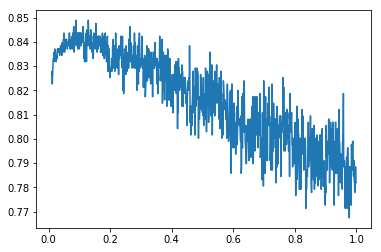

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:138: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('Accuracy RandomForest  classifier :  ', 0.812089356110381)
('Sensitivity : ', 0.8011363636363636)
('Specificity : ', 0.8484107579462102)
(' Accuracy adaptive linear regression classifier : ', 0.8265440210249672)
('confusion matrix:', array([[282,  70],
       [ 62, 347]]))
('Accuracy linear regression classifier : ', array([0.5491058], dtype=float32))
('Accuracy logistic regression classifier : ', 0.8318002628120894)
('Accuracy Gaussian Naive Bayes classifier : ', 0.80946123521682)
('Accuracy perceptron classifier : ', 0.6438896189224704)
('Running : ', 'ogboost', ' with weaklearner : ', 'adline')
('t=', 0)
('accuracy =', 0.8478964401294499)
('t=', 309)
('accuracy =', 0.8446771378708552)
('t=', 573)
('accuracy =', 0.7703862660944206)
('t=', 932)
('accuracy =', 0.7933655839668279)
('t=', 1447)
('accuracy =', 0.796594982078853)
('t=', 2232)
('accuracy =', 0.8052121617106582)
('t=', 2993)
('accuracy =', 0.8327244258872651)
('t=', 3832)
('accuracy =', 0.8232879671635343)
('t=', 4629)
('a

In [ ]:
from random import seed
from sklearn import datasets
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import *
from mlxtend.classifier import Adaline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import timeit
from sklearn.linear_model import LogisticRegression,Perceptron, SGDClassifier
from sklearn import  metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold # import KFold
# ============================================================================
# ============================================================================
# list of algorithm
algorithms = {
"smoothboost":SmoothBoost,
"ogboost":OGBooster,
"gaogboost":GAOGBooster,
"osboost":OSBoost,
"ocpboost":OCPBoost,
"expboost":EXPBoost,
"ozaboost":OzaBoostClassifier}

# list of weak learners
weak_learners ={
"adline" : ADL,
"OLR" : OLR,
"LR" : LR,
"sk_perceptron": PerceptronClassifier,
"sk_nb":NaiveBayes,
"gaussian_nb":NaiveBayes,
"nb": NaiveBayes,
"sk_decisiontree": DecisionTree,
"random_stump":RandomStump,
"decisiontree":DecisionTree,
"perceptron":Perceptron}

weak_learner= "adline" # Select the weak learner from the weak learners list 
algorithm="ogboost" # Sealect the ensembler from the algorithm list 
dataset = "eeg" # Select the dataset ("cancer" / "eeg"/ "p300")
Xx_train,X_test, yy_train,y_test,X,y= load_data(dataset,6) #LOAD DATA

X_train, X_genetic, y_train, y_genetic = train_test_split(Xx_train,yy_train,test_size = 0.08, random_state = 1)

trials=1
M=X_train.shape[1]
# kf = KFold(n_splits=14) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# # print(kf) 
# print "dataset : ", dataset,X_train.shape,X_test.shape

i=0
# for train_index, test_index in kf.split(X):
#     i+=1
#     print "TRAIN:", train_index, "TEST:", test_index
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     if i==3:
#       break



# To compare the results, the data are first trained by the basic classifiers 
# ====================================================================================
# other classifiers
# =====================================================================================

# DecisionTree
clf2= DecisionTreeClassifier(max_depth = 100)
clf2.fit(X_train,y_train)
y_pred=clf2.predict( X_test)
print ("Accuracy DecisionTree  classifier :",metrics.accuracy_score(y_test,y_pred)) 
#*****************************************************************************************
# # adaboost and gradient boosting and xgboost
# import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
# clf = AdaBoostClassifier(n_estimators=100)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print ("adaboost=",accuracy_score(y_test, y_pred))
# lr=np.array([0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
l=np.arange(0.01, 1, 0.001).tolist()
lr=np.asarray(l)
acc=np.zeros(lr.shape[0])
for i in range(lr.shape[0]):
  gbc = GradientBoostingClassifier(learning_rate=lr[i],n_estimators=100)
  gbc.fit(X_train, y_train)
  y_pred = gbc.predict(X_test)
  acc[i]=accuracy_score(y_test, y_pred)
# print ("gradient boosting",accuracy_score(y_test, y_pred))
print("alpha",lr)
print("acc",acc)
plt.plot(lr, acc)
plt.show()
# alphas = np.logspace(-3, -1, 30)

# for Model in [Lasso, Ridge]:
#     scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
#               for alpha in alphas]
#     plt.plot(alphas, scores, label=Model.__name__) 


# D_train = xgb.DMatrix(X_train, label=y_train)
# D_test = xgb.DMatrix(X_test, label=y_test)
# param = {
#     'eta': 0.3, 
#     'max_depth': 3,  
#     'objective': 'multi:softprob',  
#     'num_class': 3} 

# steps = 20  
# model = xgb.train(param, D_train, steps)

# import numpy as np
# from sklearn.metrics import precision_score, recall_score, accuracy_score

# preds = model.predict(D_test)
# best_preds = np.asarray([np.argmax(line) for line in preds])

# # print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
# # print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
# print("xgboost = {}".format(accuracy_score(y_test, best_preds)))


# *******************************************************************************

# RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict( X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print ("Accuracy RandomForest  classifier :  ",acc_rf)
# *****************************************************


# l=np.arange(0.01, 1, 0.01).tolist()
# lr=np.asarray(l)
# acc=np.zeros(lr.shape[0])
# print (y_train[0])
# y_t=np.zeros((y_train.shape[0]))
# y_t=y_train[:,0]
# y_tt=np.array(y_t, dtype=int)
# for i in range(lr.shape[0]):
#   ada = Adaline(epochs=30,eta=lr[i],minibatches=None,random_seed=1)
#   ada.fit(X_train, y_tt)
#   yyy=ada.predict(X_test)
#   acc[i]=metrics.accuracy_score(y_test,yyy)
# # print ("gradient boosting",accuracy_score(y_test, y_pred))
# print("eta",lr)
# print("acc",acc)
# plt.plot(lr, acc)
# plt.show()

# adline classifier



#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(y_test, yyy)
total1=sum(sum(cm1))

accuracy1=float(cm1[0][0]+cm1[1][1])/total1

score_adline=ada.score(X_test, y_test)
sensitivity1 = float(cm1[0][0])/(cm1[0][0]+cm1[0][1])
print ("Sensitivity : ", sensitivity1 )

specificity1 = float(cm1[1,1])/(cm1[1][0]+cm1[1][1])
print ("Specificity : ", specificity1)
print (" Accuracy adaptive linear regression classifier : " ,metrics.accuracy_score(y_test,yyy) )
print ("confusion matrix:" ,cm1)



# **********************************************************************************************

# linear regression classifier
model1=LinearRegression()
X_train.reshape(1,-1)
y_train.reshape(1,-1)
# X_genetic.reshape(1,-1)
# y_genetic.reshape(1,-1)
X_test.reshape(1,-1)
model2=model1.fit(X_train,y_train)
yy=model2.predict(X_test)
print ("Accuracy linear regression classifier : ",model2.intercept_)
# ******************************************************************
# logistic regression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
score = logisticRegr.score(X_test, y_test)
print ("Accuracy logistic regression classifier : ",score)
# ******************************************************************

# Gaussian Naive Bayes model

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print ("Accuracy Gaussian Naive Bayes classifier : ",metrics.accuracy_score(y_test, y_pred))
#****************************************************************************************

# perceptron classifier
modelll = Perceptron()
modelll.partial_fit(X_train,y_train,np.unique(np.array([y_train])))
y_p=modelll.predict(X_test)
print ("Accuracy perceptron classifier : ",metrics.accuracy_score(y_test, y_p))

# *****************************************************************************************
# print "X0",X_train[0]
# print "X1",X_train[2]


# ============================================================================================
# apply the model
# ===========================================================================================

print ("Running : ",algorithm , " with weaklearner : ",weak_learner)
alpha=0.1364825253508657
# gama=0.25840666308389154
gama=1.0/640
ta=0.7740881163694082
classess=np.unique(np.array([y_train]))
# label0=0
# label1=0
# for i in range(y_test.shape[0]):
#   if y_test[i]==0:
#     label0+=1
#   else:
#     label1+=1
# print "label0=",label0
# print "label1=",label1

model = Test(algorithms[algorithm], weak_learners[weak_learner],classess,M ,trials,alpha,ta,gama)
train_ac = model.test(X_train,y_train)
train_ac=np.asarray(train_ac)
train_accuracy=sum(train_ac)/train_ac.size
test_accuracy,y_predict= model.final_test(X_test,y_test)
y_predict=np.asarray(y_predict)


print ("total train accuracy : ",train_accuracy)

print ("total test accuracy : ",test_accuracy)

# cm1=confusion_matrix(y_test, y_predict)
# print ("confusion matrix:" ,cm1)
# total1=sum(sum(cm1))
# #####from confusion matrix calculate accuracy
# accuracy1=float(cm1[0][0]+cm1[1][1])/total1
# sensitivity1 = float(cm1[0][0])/(cm1[0][0]+cm1[0][1])
# print ("Sensitivity : ", sensitivity1) 

# specificity1 = float(cm1[1,1])/(cm1[1][0]+cm1[1][1])
# print ("Specificity : ", specificity1)


# *********************************
# ******************************************
# import matplotlib.cm as cm
# from matplotlib.colors import ListedColormap, BoundaryNorm
# import matplotlib.patches as mpatches
# import matplotlib.patches as mpatches
# plt.scatter(X_train,y_train)

# plot1

In [ ]:
# import numpy as np 
# import pandas as pd
# import matplotlib.pyplot as plt 
# import numpy as np
# import matplotlib.pyplot as plt 

# from matplotlib.colors import ListedColormap

# """ Function to color the deciosion regions """

# def plot_decision_regions(X, y,x0,x1, classifier, resolution = 0.02):

#         # setup marker generator and color map

#         markers = ('s', 'x', 'o', '^', 'v')
#         colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#         cmap = ListedColormap(colors[ : len(np.unique(y))])

#         # plot the decision surface

#         x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#         x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#         xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#           np.arange(x2_min, x2_max, resolution))

#         z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#         Z = z.reshape(xx1.shape)

#         plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
#         plt.xlim(xx1.min(), xx1.max())
#         plt.ylim(xx2.min(), xx2.max())

#         # plot class samples
#         # print ("yy",np.unique(y))
#         # for idx, cl in enumerate(np.unique(y)):
#         #   print (idx,cl)
#         plt.scatter(x0[:,0], x0[:,1],alpha = 0.8, c = cmap(0), marker = markers[0],
#           label = 0)
#         plt.scatter(x1[:, 0], x1[:, 1],alpha = 0.8, c = cmap(1), marker = markers[1],
#           label = 1)
#           # plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
#           #   alpha = 0.8, c = cmap(idx), marker = markers[idx],
#           #   label = cl)

# # from adalinegd import AdalineGD
# # # from adalinesgd import AdalineSGD
# # import pdr


# # get the iris data
# # df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
# # 	header = None)
# x=X
# label0=0
# label1=0
# for i in range(X.shape[0]):
#   if y[i][0]==0:
#     label0+=1
#   else:
#     label1+=1
# x0=np.zeros((label0,64))
# x1=np.zeros((label1,64))
# # Plot 100 samples of the data
# # y = df.iloc[0:100, 4].values
# # # y = np.where(y == 'Iris-setosa', -1, 1)
# # X = df.iloc[0:100, [0, 2]].values
# ii=0
# iii=0
# for i in range(X.shape[0]):
#   if y[i][0] == 0:
#     x0[ii,:]=x[i,:]
#     ii+=1
#   else:
#     x1[iii,:]=x[i,:]
#     iii+=1

# plt.scatter(x0[:,0], x0[:,1],color ='blue', marker = 'o', label = 'setosa')
# plt.scatter(x1[:, 0], x1[:, 1], color ='red', marker = 'o', label = 'setosa')
# # plt.scatter(X[:, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
# plt.xlabel('petal length')
# plt.ylabel('sepal length')
# plt.legend(loc = 'upper left')
# plt.show()

# # Standardize the data
# # X_std = np.copy(X)
# X_std =np.zeros((X.shape[0],2))
# X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
# X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# # Create the AdalineGD model
# model1 = Adaline(epochs=30,eta=0.01,minibatches=None,random_seed=1)
# y_t=np.zeros((y.shape[0]))
# y_t=y[:,0]
# y_tt=np.array(y_t, dtype=int)
# model1.fit(X_std, y_tt)
# # yyy=ada.predict(X_test)


# # Plot the training error
# plt.plot(range(1, len(model1.cost_) + 1), model1.cost_, marker = 'o', color = 'red')
# plt.xlabel('Epochs')
# plt.ylabel('Sum-squared-error')
# plt.show()

# # Plot the decision boundary
# plot_decision_regions(X_std, y,x0,x1, classifier = model1)
# plt.title('Adaptive linear regression ')
# plt.xlabel('sepal length [standardized')
# plt.ylabel('petal length [standardized]')
# plt.legend(loc = 'upper left')
# plt.show()

# # Create the AdalineSGD model
# # model2 = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)

# # # Train the model
# # model2.fit(X_std, y)

# # # Plot the training errors of both of the models
# # plt.plot(range(1, len(model2.cost_) + 1), model2.cost_, marker = 'x', color = 'blue')
# # plt.xlabel('Epochs')
# # plt.ylabel('Sum-squared-error')
# # plt.show()


# # # Plot the decision boundary
# # pdr.plot_decision_regions(X_std, y,x0,x1, classifier = model2)
# # plt.title('Adaline - Stochastic Gradient Descent')
# # plt.xlabel('sepal length [standardized')
# # plt.ylabel('petal length [standardized]')
# # plt.legend(loc = 'upper left')
# # plt.show()

# plot2

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, decomposition, ensemble)

X = X
class_label = y
print(class_label.size)
# X = X.reshape((X.size // 52, 52))
y2 = range(class_label.size)

n_samples, n_features = X.shape
n_neighbors = 50
n_com = 2


# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
      plt.plot(X[i][0], X[i][1], ('bo' if class_label[i] == 0 else 'ro'))
        # plt.text(X[i, 0], X[i, 1], str(class_label[i][0]),
                #  color=('r' if class_label[i][0] == 0 else 'b'),
                #  fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(n_samples):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

# ----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing PCA projection")
t0 = time()
ppca = decomposition.PCA(n_components=n_com)
X_pca = ppca.fit_transform(X)
plot_embedding(X_pca, "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

# # ----------------------------------------------------------------------
# # Projection on to the first 2 principal components

# print("Computing Kernel PCA projection")
# t0 = time()
# kpca = decomposition.KernelPCA(n_components=n_com)
# X_kpca = kpca.fit_transform(X)
# plot_embedding(X_kpca,
#                "Kernel Principal Components projection of the digits (time %.2fs)" %
#                (time() - t0))
# # ----------------------------------------------------------------------
# # Projection on to the first 2 principal components

# print("Computing Sparce PCA projection")
# t0 = time()
# spca = decomposition.SparsePCA(n_components=n_com)
# X_spca = spca.fit_transform(X)
# plot_embedding(X_pca,
#                "Sparce Principal Components projection of the digits (time %.2fs)" %
#                (time() - t0))

# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
iso = manifold.Isomap(n_neighbors, n_components=n_com)
X_iso = iso.fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

# # ----------------------------------------------------------------------
# # Locally linear embedding of the digits dataset
# print("Computing LLE embedding")
# lle = manifold.LocallyLinearEmbedding(n_neighbors, n_components=n_com, method='standard')
# t0 = time()
# X_lle = lle.fit_transform(X)
# print("Done. Reconstruction error: %g" % lle.reconstruction_error_)
# plot_embedding(X_lle,
#                "Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # Modified Locally linear embedding of the digits dataset
# print("Computing modified LLE embedding")
# mlle = manifold.LocallyLinearEmbedding(n_neighbors, n_components=n_com, method='modified')
# t0 = time()
# X_mlle = mlle.fit_transform(X)
# print("Done. Reconstruction error: %g" % mlle.reconstruction_error_)
# plot_embedding(X_mlle,
#                "Modified Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# # ----------------------------------------------------------------------
# # LTSA embedding of the digits dataset
# print("Computing LTSA embedding")
# ltsa = manifold.LocallyLinearEmbedding(n_neighbors, n_components=n_com, method='ltsa')
# t0 = time()
# X_ltsa = ltsa.fit_transform(X)
# print("Done. Reconstruction error: %g" % ltsa.reconstruction_error_)
# plot_embedding(X_ltsa,
#                "Local Tangent Space Alignment of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # MDS  embedding of the digits dataset
# print("Computing MDS embedding")
# mds = manifold.MDS(n_components=n_com, n_init=1, max_iter=100)
# t0 = time()
# X_mds = mds.fit_transform(X)
# print("Done. Stress: %f" % mds.stress_)
# plot_embedding(X_mds,
#                "MDS embedding of the digits (time %.2fs)" %
#                (time() - t0))

# # ----------------------------------------------------------------------
# # Random Trees embedding of the digits dataset
# print("Computing Totally Random Trees embedding")
# hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
# t0 = time()
# X_transformed = hasher.fit_transform(X)
# reduced = decomposition.TruncatedSVD(n_components=n_com)
# X_reduced = reduced.fit_transform(X_transformed)

# plot_embedding(X_reduced,
#                "Random forest embedding of the digits (time %.2fs)" %
#                (time() - t0))

# ----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
se = manifold.SpectralEmbedding(n_components=n_com, random_state=0,
                                eigen_solver="arpack")
t0 = time()
X_se = se.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=n_com, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

# plt.show()

#


# plot3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes","MLPClassifier","Adaline","LinearRegression"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000),
    Adaline(epochs=30,eta=0.01,minibatches=None,random_seed=1),
    LinearRegression()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)


# X_train.reshape(1,-1)
# y_train.reshape(1,-1)
# X_test.reshape(1,-1)
# model2=model1.fit(X_train,y_train)
# yy=model2.predict(X_test)
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# all_manifolds = [
#     # (X_spca, 'X_spca', spca),
#     (X_pca, 'X_pca', ppca),
#     (X_iso, 'X_iso', iso),
#     (X_lle, 'X_lle', lle),
#     (X_mlle, 'X_mlle', mlle),
#     (X_kpca, 'X_kpca', kpca),
#     (X_ltsa, 'X_ltsa', ltsa),
#     (X_mds, 'X_mds', mds),
#     (X_reduced, 'X_reduced', reduced),
#     (X_se, 'X_se', se),
#     (X_tsne, '5', se)
# ]

datasets = [(X_pca, class_label), 
            (X_iso, class_label), 
            # (X_se, class_label),
            (X_tsne, class_label)]

figure = plt.figure(figsize=(27, 9))
ii = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    y = [i[0] for i in y]
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # print "len(datasets)",len(datasets)
    # print "len(classifiers) + 1",len(classifiers) + 1
    ax = plt.subplot(len(datasets), len(classifiers) + 1, ii)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ii += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1,ii)
        if name=="Adaline":
          
          # clf= MultiOutputClassifier(clf, n_jobs=-1)
          yyyy=np.array(y_train,dtype=int)
          # y_t=np.zeros((yyyy.size,1))
          # y_t[:,0]=yyyy
          # y_tt=np.array(y_t,dtype=int)
          yyyy1=np.array(y_test,dtype=int)
          # y_t1=np.zeros((yyyy1.size,1))
          # y_t1[:,0]=yyyy1
          # y_tt1=np.array(y_t1,dtype=int)
          # y_t[:,1]=yyyy
          clf.fit(X_train, yyyy)
          score = clf.score(X_test, yyyy1)
          Z=clf.predict(np.array([xx.ravel(), xx.ravel()]).T)
          # print(multi_target_forest.predict_proba(X))
        elif name=="LinearRegression":

          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)
          Z=clf.predict(np.array([xx.ravel(), xx.ravel()]).T)

        else:
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)
        

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        elif hasattr(clf, "predict_proba") :
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        ii += 1

plt.tight_layout()
plt.show()